# Lab assignment №1, part 2

This lab assignment consists of several parts. You are supposed to make some transformations, train some models, estimate the quality of the models and explain your results.

Several comments:
* Don't hesitate to ask questions, it's a good practice.
* No private/public sharing, please. The copied assignments will be graded with 0 points.
* Blocks of this lab will be graded separately.

__*This is the second part of the assignment. First and third parts are waiting for you in the same directory.*__

## Part 2. Data preprocessing, model training and evaluation.

### 1. Reading the data
Today we work with the [dataset](https://archive.ics.uci.edu/ml/datasets/Statlog+%28Vehicle+Silhouettes%29), describing different cars for multiclass ($k=4$) classification problem. The data is available below.

In [1]:
# If on colab, uncomment the following lines

# ! wget https://raw.githubusercontent.com/girafe-ai/ml-course/22f_made/homeworks/lab01_ml_pipeline/car_data.csv

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

dataset = pd.read_csv('car_data.csv', delimiter=',', header=None).values
data = dataset[:, :-1].astype(int)
target = dataset[:, -1]

print(data.shape, target.shape)

X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.35)
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape)

(846, 19) (846,)
(549, 19) (549,) (297, 19) (297,)


To get some insights about the dataset, `pandas` might be used. The `train` part is transformed to `pd.DataFrame` below.

In [2]:
X_train_pd = pd.DataFrame(X_train)

# First 15 rows of our dataset.
X_train_pd.head(15)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
0,151,94,44,84,216,74,6,184,35,22,145,208,525,154,73,4,22,196,197
1,178,93,37,73,174,68,7,151,43,19,131,175,347,135,68,1,22,196,205
2,657,89,45,85,149,59,11,158,43,20,158,177,362,173,75,12,16,183,193
3,340,89,40,72,155,63,7,146,45,19,135,175,321,145,72,4,10,192,196
4,463,85,40,66,121,52,4,152,44,19,133,170,340,163,87,13,3,180,183
5,692,108,51,100,206,63,10,196,34,23,159,214,576,201,65,7,16,194,205
6,679,89,41,76,183,73,7,157,42,19,136,181,373,153,74,8,12,191,195
7,44,119,54,106,220,65,12,213,31,24,167,223,675,232,66,20,1,192,202
8,208,86,46,70,149,65,8,149,45,19,146,170,331,185,77,6,6,183,188
9,606,84,37,70,150,61,7,137,49,18,140,156,278,121,64,0,23,196,205


Methods `describe` and `info` deliver some useful information.

In [3]:
X_train_pd.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,415.375228,93.398907,44.510018,81.331512,167.309654,61.575592,8.542805,167.489982,41.275046,20.482696,147.298725,187.129326,432.504554,172.759563,72.615665,6.238616,12.420765,188.653916,195.449909
std,243.849139,8.314489,6.134918,15.878971,34.208393,8.204071,4.583022,32.748355,7.797092,2.549182,14.630174,30.816440,172.716844,32.024120,7.374238,4.954490,8.833393,6.104959,7.397212
min,0.000000,73.000000,33.000000,40.000000,105.000000,47.000000,2.000000,112.000000,26.000000,17.000000,118.000000,130.000000,184.000000,109.000000,60.000000,0.000000,0.000000,176.000000,181.000000
25%,207.000000,87.000000,39.000000,70.000000,139.000000,56.000000,6.000000,146.000000,34.000000,19.000000,136.000000,167.000000,317.000000,146.000000,68.000000,2.000000,5.000000,184.000000,190.000000
50%,414.000000,92.000000,44.000000,78.000000,165.000000,61.000000,8.000000,156.000000,43.000000,19.000000,145.000000,177.000000,359.000000,173.000000,72.000000,5.000000,11.000000,188.000000,197.000000
75%,628.000000,99.000000,49.000000,96.000000,194.000000,65.000000,10.000000,196.000000,46.000000,23.000000,158.000000,216.000000,575.000000,195.000000,76.000000,9.000000,18.000000,193.000000,201.000000
max,838.000000,119.000000,59.000000,110.000000,333.000000,138.000000,55.000000,265.000000,61.000000,29.000000,188.000000,320.000000,1018.000000,264.000000,135.000000,22.000000,40.000000,204.000000,210.000000


In [4]:
X_train_pd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       549 non-null    int32
 1   1       549 non-null    int32
 2   2       549 non-null    int32
 3   3       549 non-null    int32
 4   4       549 non-null    int32
 5   5       549 non-null    int32
 6   6       549 non-null    int32
 7   7       549 non-null    int32
 8   8       549 non-null    int32
 9   9       549 non-null    int32
 10  10      549 non-null    int32
 11  11      549 non-null    int32
 12  12      549 non-null    int32
 13  13      549 non-null    int32
 14  14      549 non-null    int32
 15  15      549 non-null    int32
 16  16      549 non-null    int32
 17  17      549 non-null    int32
 18  18      549 non-null    int32
dtypes: int32(19)
memory usage: 40.9 KB


### 2. Machine Learning pipeline
Here you are supposed to perform the desired transformations. Please, explain your results briefly after each task.

#### 2.0. Data preprocessing
* Make some transformations of the dataset (if necessary). Briefly explain the transformations

In [29]:
### YOUR CODE HERE
import pandas as pd

# Load the dataset
car_data = pd.read_csv('car_data.csv')
car_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 845 entries, 0 to 844
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       845 non-null    int64 
 1   95      845 non-null    int64 
 2   48      845 non-null    int64 
 3   83      845 non-null    int64 
 4   178     845 non-null    int64 
 5   72      845 non-null    int64 
 6   10      845 non-null    int64 
 7   162     845 non-null    int64 
 8   42      845 non-null    int64 
 9   20      845 non-null    int64 
 10  159     845 non-null    int64 
 11  176     845 non-null    int64 
 12  379     845 non-null    int64 
 13  184     845 non-null    int64 
 14  70      845 non-null    int64 
 15  6       845 non-null    int64 
 16  16      845 non-null    int64 
 17  187     845 non-null    int64 
 18  197     845 non-null    int64 
 19  van     845 non-null    object
dtypes: int64(19), object(1)
memory usage: 132.2+ KB


In [27]:
# Updating the column names with 'ID' as the first column name
new_column_names = [
    "ID", "COMPACTNESS", "CIRCULARITY", "DISTANCE CIRCULARITY", "RADIUS RATIO", 
    "PRAXIS ASPECT RATIO", "MAXLENGTH ASPECT RATIO", "SCATTER RATIO", 
    "ELONGATEDNESS", "PRAXIS RECTANGULARITY", "MAXLENGTH RECTANGULARITY", 
    "SCALED VARIANCE ALONG MAJOR AXIS", "SCALED VARIANCE ALONG MINOR AXIS", 
    "SCALED RADIUS OF GYRATION", "SKEWNESS ABOUT MAJOR AXIS", "SKEWNESS ABOUT MINOR AXIS", 
    "KURTOSIS ABOUT MINOR AXIS", "KURTOSIS ABOUT MAJOR AXIS", "HOLLOWS RATIO", 
    "CLASS LABEL"
]
car_data.columns = new_column_names

# Encoding the categorical "CLASS LABEL" column
car_data['CLASS LABEL'] = car_data['CLASS LABEL'].astype('category').cat.codes


In [28]:
car_data.head()

,ID,COMPACTNESS,CIRCULARITY,DISTANCE CIRCULARITY,RADIUS RATIO,PRAXIS ASPECT RATIO,MAXLENGTH ASPECT RATIO,SCATTER RATIO,ELONGATEDNESS,PRAXIS RECTANGULARITY,MAXLENGTH RECTANGULARITY,SCALED VARIANCE ALONG MAJOR AXIS,SCALED VARIANCE ALONG MINOR AXIS,SCALED RADIUS OF GYRATION,SKEWNESS ABOUT MAJOR AXIS,SKEWNESS ABOUT MINOR AXIS,KURTOSIS ABOUT MINOR AXIS,KURTOSIS ABOUT MAJOR AXIS,HOLLOWS RATIO,CLASS LABEL
0,1,91,41,84,141,57,9,149,45,19,143,170,330,158,72,9,14,189,199,3
1,2,104,50,106,209,66,10,207,32,23,158,223,635,220,73,14,9,188,196,2
2,3,93,41,82,159,63,9,144,46,19,143,160,309,127,63,6,10,199,207,3
3,4,85,44,70,205,103,52,149,45,19,144,241,325,188,127,9,11,180,183,0
4,5,107,57,106,172,50,6,255,26,28,169,280,957,264,85,5,9,181,183,0


#### 2.1. Basic logistic regression
* Find optimal hyperparameters for logistic regression with cross-validation on the `train` data (small grid/random search is enough, no need to find the *best* parameters).

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` `tol=1e-3` and ` max_iter=500`.*

c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


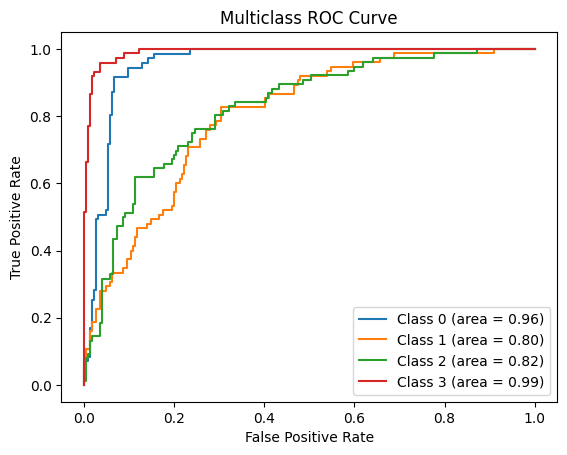

(0.7094594594594594, 0.7094594594594594, {'C': 0.1})

In [7]:
### YOUR CODE HERE
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize

# Splitting data into features and target variable
X = car_data.drop(columns=['ID', 'CLASS LABEL'])
y = car_data['CLASS LABEL']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)

# Set up logistic regression with specified hyperparameters
log_reg = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Define hyperparameter grid for a simple search
param_grid = {
    'C': [0.1, 1, 10]
}

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model from grid search
best_log_reg = grid_search.best_estimator_

# Predictions and evaluation on test data
y_pred = best_log_reg.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average='micro')

# Binarize the output for ROC curve
y_test_binarized = label_binarize(y_test, classes=list(range(len(y.unique()))))
y_proba = best_log_reg.predict_proba(X_test)

# Plot ROC curve for each class
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc_score(y_test_binarized[:, i], y_proba[:, i]):.2f})')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve")
plt.legend(loc="best")
plt.show()

accuracy, f1, grid_search.best_params_


In [ ]:
# You might use this command to install scikit-plot. 
# Warning, if you a running locally, don't call pip from within jupyter, call it from terminal in the corresponding 
# virtual environment instead

# ! pip install scikit-plot

#### 2.2. PCA: explained variance plot
* Apply the PCA to the train part of the data. Build the explaided variance plot. 

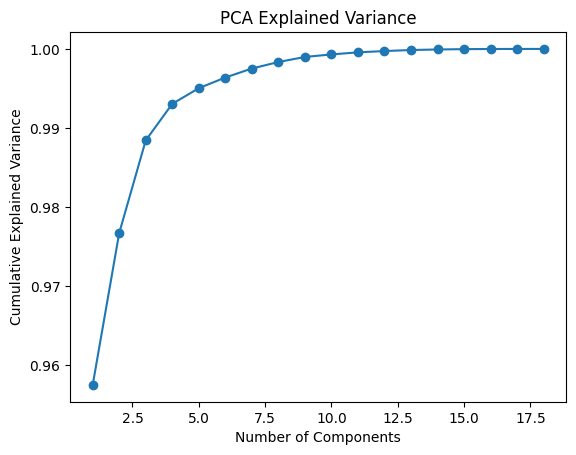

In [8]:
### YOUR CODE HERE
from sklearn.decomposition import PCA

# Fit PCA on the training data
pca = PCA().fit(X_train)

# Plot explained variance ratio
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA Explained Variance')
plt.show()


#### 2.3. PCA trasformation
* Select the appropriate number of components. Briefly explain your choice. Should you normalize the data?

*Use `fit` and `transform` methods to transform the `train` and `test` parts.*

In [20]:
### YOUR CODE HERE
# Set the number of components (adjust based on explained variance plot)
pca = PCA(n_components=6)  # example: choosing 10 components

# Fit and transform the train and test sets
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


**Note: From this point `sklearn` [Pipeline](https://scikit-learn.org/stable/modules/compose.html) might be useful to perform transformations on the data. Refer to the [docs](https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.Pipeline.html) for more information.**

#### 2.4. Logistic regression on PCA-preprocessed data.
* Find optimal hyperparameters for logistic regression with cross-validation on the transformed by PCA `train` data.

* Estimate the model quality with `f1` and `accuracy` scores.
* Plot a ROC-curve for the trained model. For the multiclass case you might use `scikitplot` library (e.g. `scikitplot.metrics.plot_roc(test_labels, predicted_proba)`).

*Note: please, use the following hyperparameters for logistic regression: `multi_class='multinomial'`, `solver='saga'` and `tol=1e-3`*

c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


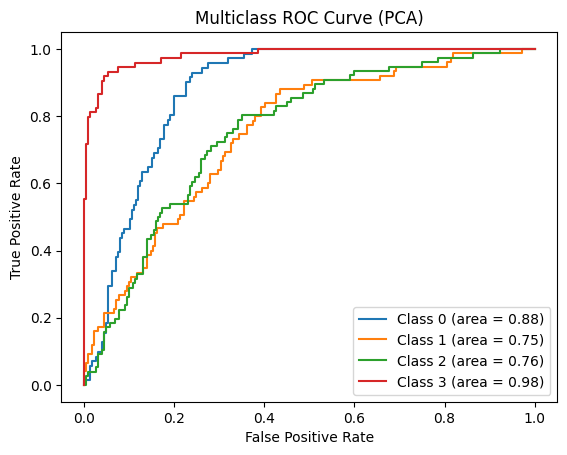

(0.5574324324324325, 0.5574324324324325, {'C': 0.1})

In [21]:
### YOUR CODE HERE
# Set up logistic regression with specified hyperparameters
log_reg_pca = LogisticRegression(multi_class='multinomial', solver='saga', tol=1e-3, max_iter=500)

# Perform Grid Search on PCA-transformed data
param_grid = {
    'C': [0.1, 1, 10]
}
grid_search_pca = GridSearchCV(log_reg_pca, param_grid, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_pca.fit(X_train_pca, y_train)

# Evaluate model on test data
y_pred_pca = grid_search_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca, average='micro')

# Plot ROC for PCA-based logistic regression
y_proba_pca = grid_search_pca.predict_proba(X_test_pca)
for i in range(y_test_binarized.shape[1]):
    fpr, tpr, _ = roc_curve(y_test_binarized[:, i], y_proba_pca[:, i])
    plt.plot(fpr, tpr, label=f'Class {i} (area = {roc_auc_score(y_test_binarized[:, i], y_proba_pca[:, i]):.2f})')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Multiclass ROC Curve (PCA)")
plt.legend(loc="best")
plt.show()

# Display results
accuracy_pca, f1_pca, grid_search_pca.best_params_


#### 2.5. Decision tree
* Now train a desicion tree on the same data. Find optimal tree depth (`max_depth`) using cross-validation.

* Measure the model quality using the same metrics you used above.

In [22]:
from sklearn.tree import DecisionTreeClassifier

# Initialize decision tree model
tree_clf = DecisionTreeClassifier(random_state=42)

# Define hyperparameter grid for tree depth
param_grid_tree = {
    'max_depth': [3, 5, 10, 15, 20]
}

# Perform Grid Search
grid_search_tree = GridSearchCV(tree_clf, param_grid_tree, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_tree.fit(X_train, y_train)

# Evaluate model
y_pred_tree = grid_search_tree.predict(X_test)
accuracy_tree = accuracy_score(y_test, y_pred_tree)
f1_tree = f1_score(y_test, y_pred_tree, average='micro')

# Display results
accuracy_tree, f1_tree, grid_search_tree.best_params_


(0.652027027027027, 0.652027027027027, {'max_depth': 5})

#### 2.6. Bagging.
Here starts the ensembling part.

First we will use the __Bagging__ approach. Build an ensemble of $N$ algorithms varying N from $N_{min}=2$ to $N_{max}=100$ (with step 5).

We will build two ensembles: of logistic regressions and of decision trees.

*Comment: each ensemble should be constructed from models of the same family, so logistic regressions should not be mixed up with decision trees.*


*Hint 1: To build a __Bagging__ ensebmle varying the ensemble size efficiently you might generate $N_{max}$ subsets of `train` data (of the same size as the original dataset) using bootstrap procedure once. Then you train a new instance of logistic regression/decision tree with optimal hyperparameters you estimated before on each subset (so you train it from scratch). Finally, to get an ensemble of $N$ models you average the $N$ out of $N_{max}$ models predictions.*

*Hint 2: sklearn might help you with this taks. Some appropriate function/class might be out there.*

* Plot `f1` and `accuracy` scores plots w.r.t. the size of the ensemble.

* Briefly analyse the plot. What is the optimal number of algorithms? Explain your answer.

* How do you think, are the hyperparameters for the decision trees you found in 2.5 optimal for trees used in ensemble? 

In [23]:
from sklearn.ensemble import BaggingClassifier

# Bagging with Logistic Regression
bagging_log_reg = BaggingClassifier(estimator=best_log_reg, n_estimators=50, random_state=42)
bagging_log_reg.fit(X_train, y_train)
y_pred_bag_log_reg = bagging_log_reg.predict(X_test)
accuracy_bag_log_reg = accuracy_score(y_test, y_pred_bag_log_reg)
f1_bag_log_reg = f1_score(y_test, y_pred_bag_log_reg, average='micro')

# Bagging with Decision Tree
bagging_tree = BaggingClassifier(estimator=grid_search_tree.best_estimator_, n_estimators=50, random_state=42)
bagging_tree.fit(X_train, y_train)
y_pred_bag_tree = bagging_tree.predict(X_test)
accuracy_bag_tree = accuracy_score(y_test, y_pred_bag_tree)
f1_bag_tree = f1_score(y_test, y_pred_bag_tree, average='micro')

# Display results
accuracy_bag_log_reg, f1_bag_log_reg, accuracy_bag_tree, f1_bag_tree


c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\P

(0.706081081081081, 0.706081081081081, 0.7263513513513513, 0.7263513513513513)

#### 2.7. Random Forest
Now we will work with the Random Forest (its `sklearn` implementation).

* * Plot `f1` and `accuracy` scores plots w.r.t. the number of trees in Random Forest.

* What is the optimal number of trees you've got? Is it different from the optimal number of logistic regressions/decision trees in 2.6? Explain the results briefly.

In [24]:
from sklearn.ensemble import RandomForestClassifier

# Initialize random forest model
rf_clf = RandomForestClassifier(random_state=42)

# Define hyperparameter grid for number of trees
param_grid_rf = {
    'n_estimators': [50, 100, 200]
}

# Perform Grid Search
grid_search_rf = GridSearchCV(rf_clf, param_grid_rf, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Evaluate model
y_pred_rf = grid_search_rf.predict(X_test)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='micro')

# Display results
accuracy_rf, f1_rf, grid_search_rf.best_params_


(0.7398648648648649, 0.7398648648648649, {'n_estimators': 200})

#### 2.8. Learning curve
Your goal is to estimate, how does the model behaviour change with the increase of the `train` dataset size.

* Split the training data into 10 equal (almost) parts. Then train the models from above (Logistic regression, Desicion Tree, Random Forest) with optimal hyperparameters you have selected on 1 part, 2 parts (combined, so the train size in increased by 2 times), 3 parts and so on.

* Build a plot of `accuracy` and `f1` scores on `test` part, varying the `train` dataset size (so the axes will be score - dataset size.

* Analyse the final plot. Can you make any conlusions using it? 

c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
c:\Users\ekart\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached whic

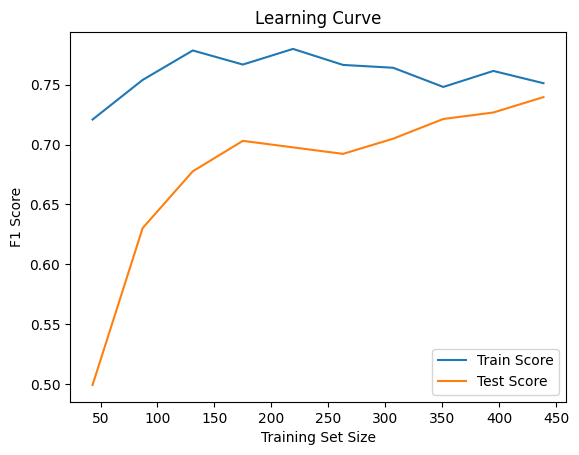

In [25]:
# YOUR CODE HERE
from sklearn.model_selection import learning_curve

# Use learning_curve function for Logistic Regression
train_sizes, train_scores, test_scores = learning_curve(best_log_reg, X_train, y_train, cv=5, scoring='f1_micro', train_sizes=np.linspace(0.1, 1.0, 10))

# Plot the learning curve
plt.plot(train_sizes, train_scores.mean(axis=1), label='Train Score')
plt.plot(train_sizes, test_scores.mean(axis=1), label='Test Score')
plt.xlabel('Training Set Size')
plt.ylabel('F1 Score')
plt.title('Learning Curve')
plt.legend()
plt.show()


#### 2.9. Boosting
Your goal is to build a boosting ensemble using xgboost, CatBoost or lightgbm package.
Please, do not use the sklearn API for these models.

Find optimal number of decision trees in the boosting ensembe using grid search or other methods.
Please, explain your answer.

In [26]:
# YOUR CODE HERE
from xgboost import XGBClassifier

# Initialize XGBoost model
xgb_clf = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)

# Define hyperparameter grid for boosting
param_grid_xgb = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2]
}

# Perform Grid Search
grid_search_xgb = GridSearchCV(xgb_clf, param_grid_xgb, cv=5, scoring='f1_micro', n_jobs=-1)
grid_search_xgb.fit(X_train, y_train)

# Evaluate model
y_pred_xgb = grid_search_xgb.predict(X_test)
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='micro')

# Display results
accuracy_xgb, f1_xgb, grid_search_xgb.best_params_


(0.7668918918918919,
 0.7668918918918919,
 {'learning_rate': 0.2, 'n_estimators': 100})